In [ ]:
!pip install xlrd
!pip install nan

In [ ]:
sep_lines = "\n" + "-"*75 + "\n"

In [ ]:
import pandas as pd
import numpy as np
import re

shark_data = pd.read_excel('https://www.sharkattackfile.net/spreadsheets/GSAF5.xls')

In [ ]:
shark_data.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
shark_data.shape

(6969, 23)

In [ ]:
shark_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6969 entries, 0 to 6968
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6944 non-null   object 
 1   Year            6942 non-null   float64
 2   Type            6926 non-null   object 
 3   Country         6894 non-null   object 
 4   State           6462 non-null   object 
 5   Location        6379 non-null   object 
 6   Activity        6358 non-null   object 
 7   Name            6724 non-null   object 
 8   Sex             6365 non-null   object 
 9   Age             3950 non-null   object 
 10  Injury          6909 non-null   object 
 11  Unnamed: 11     6382 non-null   object 
 12  Time            3418 non-null   object 
 13  Species         3812 non-null   object 
 14  Source          6925 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6819 non-null   object 
 17  href            6796 non-null   o

In [ ]:
shark_data['href formula']

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
6964    http://sharkattackfile.net/spreadsheets/pdf_di...
6965    http://sharkattackfile.net/spreadsheets/pdf_di...
6966    http://sharkattackfile.net/spreadsheets/pdf_di...
6967    http://sharkattackfile.net/spreadsheets/pdf_di...
6968    http://sharkattackfile.net/spreadsheets/pdf_di...
Name: href formula, Length: 6969, dtype: object

In [ ]:
shark_data.select_dtypes(include = 'number')

,Year,original order
0,2024.0,NaN
1,2024.0,NaN
2,2024.0,NaN
3,2024.0,NaN
4,2024.0,NaN
...,...,...
6964,NaN,NaN
6965,NaN,NaN
6966,NaN,NaN
6967,NaN,NaN


In [ ]:
shark_data.select_dtypes(include = 'object')

,Date,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,...,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",...,16h00,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",...,NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,...,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,...,11h30,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,...,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(shark_data.count())

Date              6944
Year              6942
Type              6926
Country           6894
State             6462
Location          6379
Activity          6358
Name              6724
Sex               6365
Age               3950
Injury            6909
Unnamed: 11       6382
Time              3418
Species           3812
Source            6925
pdf               6799
href formula      6819
href              6796
Case Number       6798
Case Number.1     6797
original order    6799
Unnamed: 21          1
Unnamed: 22          2
dtype: int64


In [ ]:
shark_data.nunique()

Date              6003
Year               259
Type                12
Country            225
State              902
Location          4514
Activity          1587
Name              5683
Sex                  8
Age                243
Injury            4079
Unnamed: 11         12
Time               410
Species           1675
Source            5302
pdf               6789
href formula      6785
href              6776
Case Number       6777
Case Number.1     6775
original order    6797
Unnamed: 21          1
Unnamed: 22          2
dtype: int64

In [ ]:
#There are 8 counts for sex when there could be just 2

shark_data['Sex'].unique() # regex it so "M" with white spaces and mayble 'N' to "M", we'll figure out what to do with rest later

array(['F', 'M', nan, ' M', 'M ', 'lli', 'M x 2', 'N', '.'], dtype=object)

In [ ]:
shark_data['Sex'].value_counts()

Sex
M        5578
F         779
M           2
N           2
 M          1
lli         1
M x 2       1
.           1
Name: count, dtype: int64

In [ ]:
#We could definitely clean up this section

shark_data['Type'].unique()

array(['Unprovoked', ' Provoked', 'Provoked', 'Questionable',
       'Watercraft', 'Sea Disaster', nan, '?', 'Unconfirmed',
       'Unverified', 'Invalid', 'Under investigation', 'Boat'],
      dtype=object)

In [ ]:
#Confirmation that this column can be cleaned up!

shark_data['Type'].value_counts()

Type
Unprovoked             5107
Provoked                635
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
 Provoked                 2
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [ ]:
#Not sure what this column is
# unamed 11, 21, 22, probably droppable columns with no relevance
shark_data['Unnamed: 22'].unique()

array([nan, 'Teramo', 'change filename'], dtype=object)

In [ ]:
shark_data

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
shark_data["Country"].value_counts()

Country
USA                   2538
AUSTRALIA             1481
SOUTH AFRICA           597
NEW ZEALAND            144
BAHAMAS                136
                      ... 
PUERTO RICO              1
RED SEA                  1
Coral Sea                1
BRITISH ISLES            1
CEYLON (SRI LANKA)       1
Name: count, Length: 225, dtype: int64

In [ ]:
shark_data['State'].value_counts()

State
Florida                1178
New South Wales         521
Queensland              347
Hawaii                  341
California              323
                       ... 
Shizuoka Prefecture       1
Brindisi Province         1
Kagawa Prefecture         1
 Upolu Island             1
Moala Island              1
Name: count, Length: 902, dtype: int64

In [ ]:
activity = shark_data['Activity'].value_counts()
print(activity[activity > 500],end=sep_lines)
print(activity[(activity <= 50) & (activity > 25)],end=sep_lines) # some values are overly specific and can be replaced with other categories
print(activity[(activity <= 25) & (activity >= 10)],end=sep_lines)
print(activity[activity <= 3],end=sep_lines)
# Also instance of duplicate values: Swimming = merge them

Activity
Surfing     1121
Swimming     976
Name: count, dtype: int64
---------------------------------------------------------------------------
Activity
Body surfing       50
Swimming           47
Boogie boarding    42
Kayaking           39
Free diving        33
Treading water     33
Fell overboard     32
Pearl diving       32
Name: count, dtype: int64
---------------------------------------------------------------------------
Activity
Windsurfing           20
Walking               17
Boogie Boarding       17
Canoeing              16
Floating              16
Fishing               16
Shark fishing         15
Surf fishing          14
Playing               13
Surf-skiing           13
Rowing                12
Surf skiing           12
Scuba Diving          12
Surf skiing           12
Paddle boarding       11
Freediving            11
Fishing for sharks    11
Sponge diving         10
Name: count, dtype: int64
---------------------------------------------------------------------------
Activit

In [ ]:
print(shark_data['Injury'].unique(),end=sep_lines)
print(shark_data['Injury'].value_counts(),end=sep_lines)

['Minor injuries to back, abdomen and legs'
 'No injury, shark bit surfboard' 'Lacerations to left foot' ...
 'FATAL, leg stripped of flesh  '
 'FATAL, knocked overboard by tail of shark & carried off by shark '
 'FATAL. "Shark bit him in half, carrying away the lower extremities" ']
---------------------------------------------------------------------------
Injury
FATAL                                                                              863
Foot bitten                                                                        100
Survived                                                                            97
No injury                                                                           85
Leg bitten                                                                          81
                                                                                  ... 
Right calf & heel bitten                                                             1
Multiple bites to foot 

In [ ]:
shark_data.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [ ]:
print(shark_data['Source'].unique(), end=sep_lines)
print(shark_data['Species '].value_counts(),end=sep_lines)

['Yahoo News, 3/15/2024' 'Surfer, 3/6/2024F' 'Hawaii News Now, 3/4/2024'
 ... 'F. Schwartz, p.23; C. Creswell, GSAF' 'The Sun, 10/20/1938'
 'S.W. Baker']
---------------------------------------------------------------------------
Species 
White shark                                                                                                                      194
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   92
Tiger shark                                                                                                                       89
                                                                                                

In [ ]:
###   https://www.britannica.com/animal/white-shark

In [ ]:
import os
COLAB_PROJECT_PATH = "/content/drive/MyDrive/Colab Notebooks/IronHacks2024_Data_Analytics/DA_Week_2_Lessons/#2_Shark_Attack_Matt_Hooper"
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab import drive
  drive.mount('/content/drive',force_remount=True)
  os.chdir(COLAB_PROJECT_PATH)

Running on CoLab
Mounted at /content/drive


In [ ]:
%ls

 All_Species_regex.txt   Created_Files/                 'Quest Shark Attack.ipynb'
'All Species.txt'        day2_shark_attack.pkl           shark_attack_research/
 Business_Hypothesis/   'Quest Shark Attack (1).ipynb'   Unique_Counts.txt


In [ ]:
import re

In [ ]:
with open('./Unique_Counts.txt', 'w+') as f:
  for key in shark_data.columns:
    if re.search("Unnamed|Name|Case Number|pdf|href|original order|Source", key) is None:
      f.writelines(f"{key}: {shark_data[key].unique()}"+sep_lines)
      f.writelines(f"{shark_data[key].value_counts()}"+sep_lines)

with open('./Unique_Counts.txt', 'r') as f:
  data = f.readlines()

In [ ]:
print(*data)

Date: ['15 Mar 2024' '04 Mar 2024' '02 Mar-2024' ... '1883-1889' '1845-1853' nan]
 ---------------------------------------------------------------------------
 Date
 1957           9
 1942           8
 1958           7
 No date        6
 1956           6
               ..
 07-Jul-2000    1
 09-Jul-2000    1
 10-Jul-2000    1
 12-Jul-2000    1
 1845-1853      1
 Name: count, Length: 6003, dtype: int64
 ---------------------------------------------------------------------------
 Year: [2024. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan 2016. 2015. 2014.
  2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004. 2003. 2002.
  2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993. 1992. 1991.
  1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981. 1980. 1979.
  1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968. 1967. 1966.
  1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956. 1955. 1954.
  1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945. 1944. 1

# **Day 2 Activities**

In [ ]:
import os
COLAB_PROJECT_PATH = "/content/drive/MyDrive/Colab Notebooks/IronHacks2024_Data_Analytics/DA_Week_2_Lessons/#2_Shark_Attack_Matt_Hooper"
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab import drive
  drive.mount('/content/drive',force_remount=True)
  os.chdir(COLAB_PROJECT_PATH)

# from google.colab import files
# src = list(files.upload().values())[0]

Running on CoLab
Mounted at /content/drive


In [ ]:
%ls

 All_Species_regex.txt   Created_Files/                 'Quest Shark Attack.ipynb'
'All Species.txt'        day2_shark_attack.pkl           shark_attack_research/
 Business_Hypothesis/   'Quest Shark Attack (1).ipynb'   Unique_Counts.txt


In [ ]:
shark_data.shape

(6969, 23)

In [ ]:
shark_data.drop(columns=["Unnamed: 21","Unnamed: 22", "Unnamed: 11", "Time", "href", "href formula", "Source", "Case Number", "Case Number.1", "original order","pdf", "Date"], inplace = True)

In [ ]:
shark_data.isna().sum()

Year          27
Type          43
Country       75
State        507
Location     590
Activity     611
Name         245
Sex          604
Age         3019
Injury        60
Species     3157
dtype: int64

In [ ]:
shark_data.columns
shark_data["Species "].value_counts()

Species 
White shark                                                                                                                      194
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   92
Tiger shark                                                                                                                       89
                                                                                                                                ... 
1.2 m to 1.8 m [4' to 6'] shark                                                                                                    1
Grey nurse shark, 3 m female                                

In [ ]:
shark_data.Sex.value_counts()

Sex
M        5578
F         779
M           2
N           2
 M          1
lli         1
M x 2       1
.           1
Name: count, dtype: int64

In [ ]:
shark_data.Sex.unique()

array(['F', 'M', nan, ' M', 'M ', 'lli', 'M x 2', 'N', '.'], dtype=object)

In [ ]:
# clean out Sex of victim
shark_data['Sex'] = shark_data['Sex'].replace({'N': 'M', '.': float('NaN'), ' M': 'M', 'M ': 'M', 'M x 2': 'M', 'lli': float('NaN'), None: float("NaN")})
shark_data['Sex'].unique()

array(['F', 'M', nan], dtype=object)

In [ ]:
shark_data['Type'] = shark_data['Type'].replace({' Provoked':'Provoked', 'Boat':'Watercraft', 'Under investigation':'Unverified', '?': 'Questionable'})
shark_data['Type'].value_counts()

Type
Unprovoked      5107
Provoked         637
Invalid          552
Watercraft       362
Sea Disaster     242
Questionable      23
Unverified         2
Unconfirmed        1
Name: count, dtype: int64

In [ ]:
shark_data['Country'] = shark_data['Country'].fillna('N/A')
shark_data['Country'] = shark_data['Country'].apply(lambda country: str(country).strip().upper())
shark_data['Country'].unique()

array(['AUSTRALIA', 'USA', 'INDIA', 'TRINIDAD', 'BAHAMAS', 'SOUTH AFRICA',
       'MEXICO', 'NEW ZEALAND', 'EGYPT', 'BELIZE', 'PHILIPPINES',
       'CORAL SEA', 'SPAIN', 'PORTUGAL', 'SAMOA', 'COLOMBIA', 'ECUADOR',
       'FRENCH POLYNESIA', 'NEW CALEDONIA', 'TURKS AND CAICOS', 'CUBA',
       'BRAZIL', 'SEYCHELLES', 'ARGENTINA', 'FIJI', 'MALDIVES', 'ENGLAND',
       'JAPAN', 'INDONESIA', 'JAMAICA', 'THAILAND', 'COLUMBIA',
       'COSTA RICA', 'BRITISH OVERSEAS TERRITORY', 'CANADA', 'JORDAN',
       'ST KITTS / NEVIS', 'ST MARTIN', 'PAPUA NEW GUINEA',
       'REUNION ISLAND', 'ISRAEL', 'CHINA', 'IRELAND', 'ITALY',
       'MALAYSIA', 'LIBYA', 'N/A', 'MAURITIUS', 'SOLOMON ISLANDS',
       'ST HELENA, BRITISH OVERSEAS TERRITORY', 'COMOROS', 'REUNION',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'CAPE VERDE',
       'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE',
       'PUERTO RICO', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'TRINIDAD & TOBAGO', 'KIRIBAT

In [ ]:
shark_data['Injury'].unique()

array(['Minor injuries to back, abdomen and legs',
       'No injury, shark bit surfboard', 'Lacerations to left foot', ...,
       'FATAL, leg stripped of flesh  ',
       'FATAL, knocked overboard by tail of shark & carried off by shark ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

In [ ]:
shark_data.shape

(6969, 11)

In [ ]:
shark_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6969 entries, 0 to 6968
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      6942 non-null   float64
 1   Type      6926 non-null   object 
 2   Country   6969 non-null   object 
 3   State     6462 non-null   object 
 4   Location  6379 non-null   object 
 5   Activity  6358 non-null   object 
 6   Name      6724 non-null   object 
 7   Sex       6363 non-null   object 
 8   Age       3950 non-null   object 
 9   Injury    6909 non-null   object 
 10  Species   3812 non-null   object 
dtypes: float64(1), object(10)
memory usage: 599.0+ KB


In [ ]:
shark_data.to_pickle('./day22_shark_attack.pkl')

# Day 3 Activities

In [ ]:
def pattern_filtering(df, column, pattern):

  # Fills null values with 'N/A'
  df[column] = df[column].fillna('N/A')

  # Converts column values to string type
  df[column] = df[column].astype(str)

  # Strips column values from whitespace
  df[column] = df[column].apply(lambda value : str(value).strip())

  # Creates a new dataframe with records that contain pattern in column values
  filtered_df = df[df.loc[:, column].str.contains(pattern, case = False, regex = True)]

  # Resetting index for new df
  filtered_df.reset_index(drop=True, inplace=True)

  # Extracts the pattern in the column value and sets its as new value
  filtered_df[column] = filtered_df.loc[:, column].str.extract(pattern, flags=re.IGNORECASE)

  # Formats column values to title case
  filtered_df[column] = filtered_df.loc[:, column].str.title()

  return filtered_df



In [ ]:
import numpy as np

def string_detection(df, column, regex_pattern, word_to_detect):
  # Detect strings that contain "fatal" (case insensitive) pattern
  detected_pattern = df['Injury'].str.contains(r'(?<!non-)fatal', case=False, na=False)

  # Replace non-matching values with default value
  default_value = input("Please a default to put in case value is not detected: ")
  df[column] = np.where(detected_pattern, word_to_detect, default_value)

  # Format values to title case
  df[column] = df.loc[:, column].str.title()


In [ ]:
shark_data.columns = shark_data.columns.str.strip()

# Regular expression pattern to match the whole word "white"
pattern = r"\b(white shark)\b"

shark_data["Species"] = shark_data['Species'].fillna('N/A')

shark_data["Species"] = shark_data["Species"].astype(str)

shark_data["Species"] = shark_data["Species"].apply(lambda specie : str(specie).strip())

# # Filter rows containing the word "white shark" (case-insensitive, if required)
white_shark= shark_data[shark_data.loc[:,'Species'].str.contains(pattern, case=False, regex=True)]

<ipython-input-18-e266c86a4d56>:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  white_shark= shark_data[shark_data.loc[:,'Species'].str.contains(pattern, case=False, regex=True)]


In [ ]:
white_shark["Species"]
white_shark["Injury"].value_counts()

Injury
FATAL                                                                         86
No injury                                                                     16
No injury, board bitten                                                       15
Leg bitten                                                                    12
No injury, kayak bitten                                                       12
                                                                              ..
Dorsum of foot/ankle  injured by surfboard skeg or other inanimate object.     1
Lower right leg lacerated                                                      1
Lacerations to right arm & thigh                                               1
Lacerations to legs                                                            1
No injury to occupant; shark capsized boat                                     1
Name: count, Length: 492, dtype: int64

In [ ]:
white_shark.reset_index(drop=True, inplace=True)
white_shark["Species"] = white_shark.loc[:, 'Species'].str.extract(pattern, flags=re.IGNORECASE)
white_shark["Species"] = white_shark.loc[:, 'Species'].str.title()
white_shark["Species"].value_counts()

<ipython-input-30-390817fc9fe2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_shark["Species"] = white_shark.loc[:, 'Species'].str.extract(pattern, flags=re.IGNORECASE)
<ipython-input-30-390817fc9fe2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_shark["Species"] = white_shark.loc[:, 'Species'].str.title()


Species
White Shark    693
Name: count, dtype: int64

In [ ]:
# Detect strings that contain "fatal" (case insensitive)
contains_fatal = white_shark['Injury'].str.contains(r'(?<!non-)fatal', case=False, na=False)


0      False
1       True
2       True
3      False
4       True
       ...  
688     True
689    False
690    False
691    False
692    False
Name: Injury, Length: 693, dtype: bool

In [ ]:
# Replace non-matching values with "non-fatal"
white_shark['Injury'] = np.where(contains_fatal, 'fatal', 'non-fatal')

# Replace non-matching values with "non-fatal" using .loc
white_shark.loc[:, 'Injury'] = np.where(contains_fatal, 'fatal', 'non-fatal')

# Optionally change to title case
white_shark['Injury'] = white_shark.loc[:,'Injury'].str.title()
# # Display the updated DataFrame
white_shark

<ipython-input-31-2b574b76dd2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_shark['Injury'] = np.where(contains_fatal, 'fatal', 'non-fatal')
<ipython-input-31-2b574b76dd2d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_shark['Injury'] = white_shark.loc[:,'Injury'].str.title()


,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Species
0,2024.0,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surfing,Murray Adams,M,64,Non-Fatal,White Shark
1,2023.0,Unprovoked,MEXICO,Sonora,"Tojahui Beach, Yavaros, Huatabampo",Free diving,Víctor Alejandro “N”,M,22,Fatal,White Shark
2,2023.0,Unprovoked,AUSTRALIA,South Australia,Ethel Beach,Surfing,Khai Cowley,M,15,Fatal,White Shark
3,2023.0,Unprovoked,NEW ZEALAND,North Island,Cape Pallister,Free diving,male,M,NaN,Non-Fatal,White Shark
4,2023.0,Unprovoked,AUSTRALIA,South Australia,Streaky Bay,Surfing,Todd Gendle,M,55,Fatal,White Shark
...,...,...,...,...,...,...,...,...,...,...,...
688,1721.0,Unprovoked,ITALY,Sardinia,"Ponte della Maddelena,",Swimming,male,M,NaN,Fatal,White Shark
689,1700.0,Unprovoked,FRANCE,Côte d'Azur,Antibes,Bathing,seaman,M,NaN,Non-Fatal,White Shark
690,0.0,Unprovoked,BAHAMAS,Andros Islands,NaN,NaN,"male, a sponge Diver",M,NaN,Non-Fatal,White Shark
691,0.0,Unprovoked,USA,California,"Capistrano, Orange County",NaN,girl,F,NaN,Non-Fatal,White Shark


In [ ]:
white_shark.groupby("Species")["Injury"].value_counts()

Species      Injury   
White Shark  Non-Fatal    533
             Fatal        160
Name: count, dtype: int64

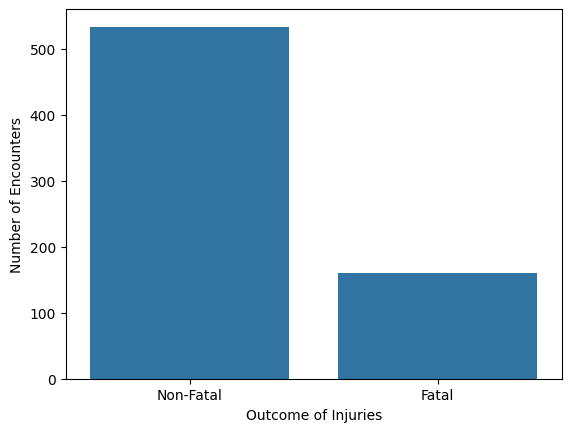

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of white shark injuries
count_plot = sns.countplot(x='Injury' ,data=white_shark)

# Alternatively, you can use .set_xlabel() and .set_ylabel()
count_plot.set_xlabel("Outcome of Injuries")
count_plot.set_ylabel("Number of Encounters")

# Show the plot
plt.show()